In [42]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [43]:
# n = 100
# time = np.arange(n)

# # –ó—Ä–æ—Å—Ç–∞—é—á–∏–π —Ç—Ä–µ–Ω–¥ –∑ –≤–∞—Ä—ñ–∞—Ü—ñ—î—é
# bets_increasing = np.random.poisson(lam=5 + np.linspace(1, 3, n//2), size=n//2)
# # –î–æ–¥–∞–º–æ —Ç—Ä–æ—Ö–∏ –Ω–æ—Ä–º–∞–ª—å–Ω–æ–≥–æ —à—É–º—É (–≤—ñ–¥–∫–∏–¥–∞—î–º–æ –≤—ñ–¥‚Äô—î–º–Ω—ñ)
# noise_inc = np.random.normal(0, 1, n//2)
# bets_increasing = np.maximum(bets_increasing + noise_inc, 1).astype(int)

# # –°–ø–∞–¥–Ω–∏–π —Ç—Ä–µ–Ω–¥ –∑ –≤–∞—Ä—ñ–∞—Ü—ñ—î—é
# bets_decreasing = np.random.poisson(lam=6 - np.linspace(1, 3, n//2), size=n//2)
# noise_dec = np.random.normal(0, 2, n//2)
# bets_decreasing = np.maximum(bets_decreasing + noise_dec, 1).astype(int)


# bets = np.concatenate([bets_increasing, bets_decreasing])
# bets

In [44]:
n = 100
time = np.arange(n)

# –°–ø–∞–¥–Ω–∏–π —Ç—Ä–µ–Ω–¥ –∑ –≤–∞—Ä—ñ–∞—Ü—ñ—î—é
bets_decreasing = np.random.poisson(lam=6 - np.linspace(1, 3, n//2), size=n//2)
noise_dec = np.random.normal(0, 2, n//2)
bets_decreasing = np.maximum(bets_decreasing + noise_dec, 1).astype(int)

# –ó—Ä–æ—Å—Ç–∞—é—á–∏–π —Ç—Ä–µ–Ω–¥ –∑ –≤–∞—Ä—ñ–∞—Ü—ñ—î—é
bets_increasing = np.random.poisson(lam=5 + np.linspace(1, 3, n//2), size=n//2)
noise_inc = np.random.normal(0, 1, n//2)
bets_increasing = np.maximum(bets_increasing + noise_inc, 1).astype(int)

# –¢–µ–ø–µ—Ä –Ω–∞–≤–ø–∞–∫–∏: —Å–ø–æ—á–∞—Ç–∫—É —Å–ø–∞–¥–Ω–∏–π, –ø–æ—Ç—ñ–º –∑—Ä–æ—Å—Ç–∞—é—á–∏–π
bets = np.concatenate([bets_decreasing, bets_increasing])
bets

array([ 4,  1,  6,  5,  2,  6,  2,  5,  5,  6,  4,  1,  5,  6,  2,  1,  4,
        3,  5,  6,  1,  2,  1,  3,  1,  4,  5,  2, 12,  1,  6,  6,  3,  3,
        6,  2,  5,  2,  1,  2,  7,  1,  4,  2,  3,  5,  3,  3,  1,  1,  6,
        7,  6,  8,  1,  4,  9,  6,  4,  6,  4,  8,  3,  5, 10, 10,  1,  1,
        3, 10,  4, 10,  8,  8,  4,  6, 10, 13, 10,  6,  8, 12, 10,  6,  6,
        7,  6,  8,  3,  3,  8,  9,  6,  8, 12,  9, 11,  8,  9,  8])

In [45]:
def calculate_interest(bets):
    cumulative = np.cumsum(bets)
    cum_vol_norm = (cumulative - cumulative.min()) / (cumulative.max() - cumulative.min() + 1e-9)
    time_norm = np.linspace(0, 1, len(cum_vol_norm)).reshape(-1, 1)
    ideal_line = time_norm.ravel()

    # --- —ñ–Ω—Ç–µ–≥—Ä–∞–ª—å–Ω–∏–π —Å–ø–æ—Å—ñ–± ---
    diff = cum_vol_norm - ideal_line
    interes_trapz = -np.trapz(diff, ideal_line)
    if np.isnan(interes_trapz) or interes_trapz is None:
        interes_trapz = 0.0

    # --- —Ä–µ–≥—Ä–µ—Å—ñ—è ---
    model = LinearRegression().fit(time_norm, cum_vol_norm)
    slope = model.coef_[0]
    intercept = model.intercept_
    r2 = model.score(time_norm, cum_vol_norm)

    # --- –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è –≤—ñ–¥ —ñ–¥–µ–∞–ª—å–Ω–æ—ó –ª—ñ–Ω—ñ—ó (y = x) ---
    mse_vs_ideal = np.mean((cum_vol_norm - ideal_line) ** 2)

    return {
        "interes_trapz": interes_trapz,
        "slope": slope,
        "intercept": intercept,
        "r2": r2,
        "mse_vs_ideal": mse_vs_ideal
    }

res = calculate_interest(bets)
res

{'interes_trapz': 0.09110296826306216,
 'slope': 0.9501199141009107,
 'intercept': -0.0652518956308964,
 'r2': 0.9695958497776835,
 'mse_vs_ideal': 0.010752709535392351}

- interes_trapz = -0.0547

    –¶–µ –ø–ª–æ—â–∞ –º—ñ–∂ —Ä–µ–∞–ª—å–Ω–æ—é –∫—É–º—É–ª—è—Ç–∏–≤–Ω–æ—é –∫—Ä–∏–≤–æ—é —ñ —ñ–¥–µ–∞–ª—å–Ω–æ—é –ª—ñ–Ω—ñ—î—é (y=x).

        üîπ –ó–Ω–∞–∫ –ø–æ–∫–∞–∑—É—î, –∫—É–¥–∏ ¬´–∑–∞–≤–∞–ª—é—î—Ç—å—Å—è¬ª –∫—Ä–∏–≤–∞ (–≤–∏—â–µ —á–∏ –Ω–∏–∂—á–µ —ñ–¥–µ–∞–ª—É).
        üîπ –ß–∏–º –±—ñ–ª—å—à–µ –∑–∞ –º–æ–¥—É–ª–µ–º –∑–Ω–∞—á–µ–Ω–Ω—è ‚Äî —Ç–∏–º —Å–∏–ª—å–Ω—ñ—à–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è –≤—ñ–¥ —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–æ–≥–æ —Ä–æ—Å—Ç—É.

- slope = 1.042

    –ù–∞—Ö–∏–ª —Ä–µ–≥—Ä–µ—Å—ñ–π–Ω–æ—ó –ø—Ä—è–º–æ—ó. –Ü–¥–µ–∞–ª—å–Ω–æ –º–∞–ª–æ –±–∏ –±—É—Ç–∏ 1.

        üîπ –Ø–∫—â–æ –±—ñ–ª—å—à–µ 1 ‚Üí —Ä—ñ—Å—Ç –∫—É–º—É–ª—è—Ç–∏–≤–Ω–æ—ó –∫—Ä–∏–≤–æ—ó —à–≤–∏–¥—à–∏–π, –Ω—ñ–∂ —Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω–∏–π.
        üîπ –Ø–∫—â–æ –º–µ–Ω—à–µ 1 ‚Üí –ø–æ–≤—ñ–ª—å–Ω—ñ—à–∏–π.

- intercept = 0.033

    –ó—Å—É–≤ –Ω–∞ —Å—Ç–∞—Ä—Ç—ñ. –Ü–¥–µ–∞–ª—å–Ω–æ –º–∞–ª–æ –±–∏ –±—É—Ç–∏ 0.

        üîπ –ü–æ–∑–∏—Ç–∏–≤–Ω–∏–π ‚Äî –∫—Ä–∏–≤–∞ —Å—Ç–∞—Ä—Ç—É—î ¬´–≤–∏—â–µ¬ª —ñ–¥–µ–∞–ª—É.
        üîπ –ù–µ–≥–∞—Ç–∏–≤–Ω–∏–π ‚Äî –Ω–∏–∂—á–µ.

- r2 = 0.986

    –ù–∞—Å–∫—ñ–ª—å–∫–∏ –¥–æ–±—Ä–µ –ª—ñ–Ω—ñ–π–Ω–∞ —Ä–µ–≥—Ä–µ—Å—ñ—è –æ–ø–∏—Å—É—î —Ç–≤–æ—é –∫—É–º—É–ª—è—Ç–∏–≤–Ω—É –∫—Ä–∏–≤—É.
        
        üîπ –ë–ª–∏–∑—å–∫–µ –¥–æ 1 ‚Üí –∫—Ä–∏–≤–∞ –º–∞–π–∂–µ –ª—ñ–Ω—ñ–π–Ω–∞.
        üîπ –Ø–∫—â–æ —Å–∏–ª—å–Ω–æ –ø–∞–¥–∞—î ‚Üí —î –≤–∏–∫—Ä–∏–≤–ª–µ–Ω–Ω—è.

- mse_vs_ideal = 0.00436

    –°–µ—Ä–µ–¥–Ω—î –∫–≤–∞–¥—Ä–∞—Ç–∏—á–Ω–µ –≤—ñ–¥—Ö–∏–ª–µ–Ω–Ω—è –≤—ñ–¥ —ñ–¥–µ–∞–ª—å–Ω–æ—ó –ø—Ä—è–º–æ—ó y=x.

        üîπ –ß–∏–º –±–ª–∏–∂—á–µ –¥–æ 0 ‚Äî —Ç–∏–º ¬´—Ä—ñ–≤–Ω–æ–º—ñ—Ä–Ω—ñ—à–µ¬ª —Ä–æ–∑–ø–æ–¥—ñ–ª–µ–Ω–∏–π —Ç–≤—ñ–π –æ–±‚Äô—î–º —Å—Ç–∞–≤–æ–∫.

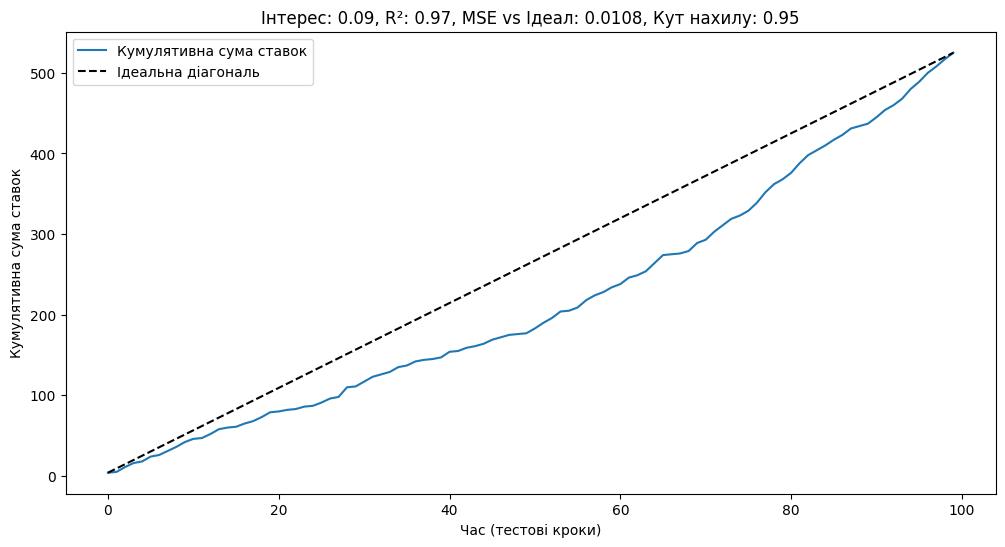

In [46]:
cumulative = np.cumsum(bets)

plt.figure(figsize=(12,6))
plt.plot(time, cumulative, label='–ö—É–º—É–ª—è—Ç–∏–≤–Ω–∞ —Å—É–º–∞ —Å—Ç–∞–≤–æ–∫')

plt.plot([time.min(), time.max()], [cumulative.min(), cumulative.max()], 
         'k--', label='–Ü–¥–µ–∞–ª—å–Ω–∞ –¥—ñ–∞–≥–æ–Ω–∞–ª—å')

plt.xlabel('–ß–∞—Å (—Ç–µ—Å—Ç–æ–≤—ñ –∫—Ä–æ–∫–∏)')
plt.ylabel('–ö—É–º—É–ª—è—Ç–∏–≤–Ω–∞ —Å—É–º–∞ —Å—Ç–∞–≤–æ–∫')
plt.title(f'–Ü–Ω—Ç–µ—Ä–µ—Å: {res["interes_trapz"]:.2f}, R¬≤: {res["r2"]:.2f}, MSE vs –Ü–¥–µ–∞–ª: {res["mse_vs_ideal"]:.4f}, –ö—É—Ç –Ω–∞—Ö–∏–ª—É: {res["slope"]:.2f}')
plt.legend()
plt.show()

/var/folders/7x/q4zhf1wx08z6l2f4bqz5b8dc0000gn/T/ipykernel_48327/2750529564.py:3: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(time, bets, cmap='coolwarm', label='–ë–æ–Ω—É—Å (—á–µ—Ä–≤–æ–Ω–∏–π - —Ç–∞–∫)')


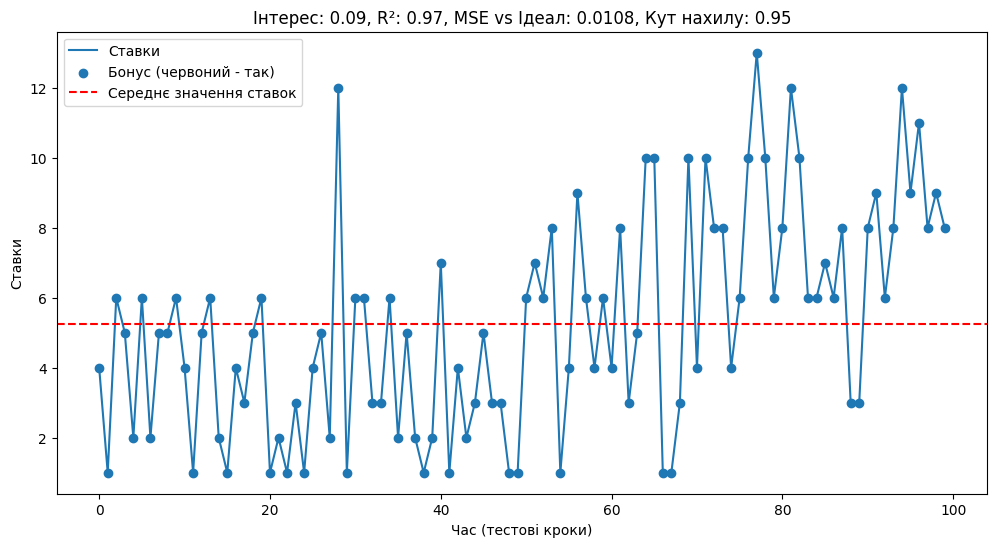

In [47]:
plt.figure(figsize=(12,6))
plt.plot(time, bets, label='–°—Ç–∞–≤–∫–∏')
plt.scatter(time, bets, cmap='coolwarm', label='–ë–æ–Ω—É—Å (—á–µ—Ä–≤–æ–Ω–∏–π - —Ç–∞–∫)')

plt.axhline(y=bets.mean(), color='r', linestyle='--', label='–°–µ—Ä–µ–¥–Ω—î –∑–Ω–∞—á–µ–Ω–Ω—è —Å—Ç–∞–≤–æ–∫')

plt.xlabel('–ß–∞—Å (—Ç–µ—Å—Ç–æ–≤—ñ –∫—Ä–æ–∫–∏)')
plt.ylabel('–°—Ç–∞–≤–∫–∏')
plt.title(f'–Ü–Ω—Ç–µ—Ä–µ—Å: {res["interes_trapz"]:.2f}, R¬≤: {res["r2"]:.2f}, MSE vs –Ü–¥–µ–∞–ª: {res["mse_vs_ideal"]:.4f}, –ö—É—Ç –Ω–∞—Ö–∏–ª—É: {res["slope"]:.2f}')
plt.legend()
plt.show()